<a href="https://colab.research.google.com/github/ashia-002/python-oop-pandas-numpy/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Loading & Exploration

## Load the dataset in Python using Pandas.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_pigeon_disease_synthetic.csv to merged_pigeon_disease_synthetic (1).csv


### Display the first 5 rows.

In [2]:
import pandas as pd
df = pd.read_csv('merged_pigeon_disease_synthetic.csv')
df.head()

,Age,Season,Housing,Rearing,Cleaning,Water,FeedQuality,FeedSupplement,Vaccination,Deworming,Treatment,Disease
0,Adult,Winter,Modern,Semi-scavenging,Regular,Tubewell,Good,1.0,Irregular,Irregular,NaN,Coccidiosis
1,Adult,Winter,Modern,Semi-scavenging,Irregular,Tubewell,Good,0.0,NaN,NaN,NaN,Strongyloidiasis
2,Adult,Rainy,Modern,Intensive,Regular,Other,Medium,0.0,Regular,Irregular,NaN,Salmonella
3,Adult,Summer,Modern,Scavenging,NaN,Tubewell,Poor,1.0,Irregular,Regular,Village Doctor,Strongyloidiasis
4,Young,Winter,Modern,Semi-scavenging,Regular,Tap,Poor,1.0,Irregular,Irregular,Village Doctor,ND


### Print the shape of the dataset.

In [3]:
print(df.shape)

(1225, 12)


### Print the columns

In [4]:
columns = df.columns
print(columns)

Index(['Age', 'Season', 'Housing', 'Rearing', 'Cleaning', 'Water',
       'FeedQuality', 'FeedSupplement', 'Vaccination', 'Deworming',
       'Treatment', 'Disease'],
      dtype='object')


In [5]:
print(df.info)

<bound method DataFrame.info of         Age  Season Housing          Rearing   Cleaning     Water FeedQuality  \
0     Adult  Winter  Modern  Semi-scavenging    Regular  Tubewell        Good   
1     Adult  Winter  Modern  Semi-scavenging  Irregular  Tubewell        Good   
2     Adult   Rainy  Modern        Intensive    Regular     Other      Medium   
3     Adult  Summer  Modern       Scavenging        NaN  Tubewell        Poor   
4     Young  Winter  Modern  Semi-scavenging    Regular       Tap        Poor   
...     ...     ...     ...              ...        ...       ...         ...   
1220  Squab  Winter     NaN              NaN        NaN       NaN         NaN   
1221  Adult  Winter     NaN              NaN        NaN       NaN         NaN   
1222  Young  Winter     NaN              NaN        NaN       NaN         NaN   
1223  Adult  Winter     NaN              NaN        NaN       NaN         NaN   
1224  Squab  Winter     NaN              NaN        NaN       NaN         NaN

### Distribution of each diseases

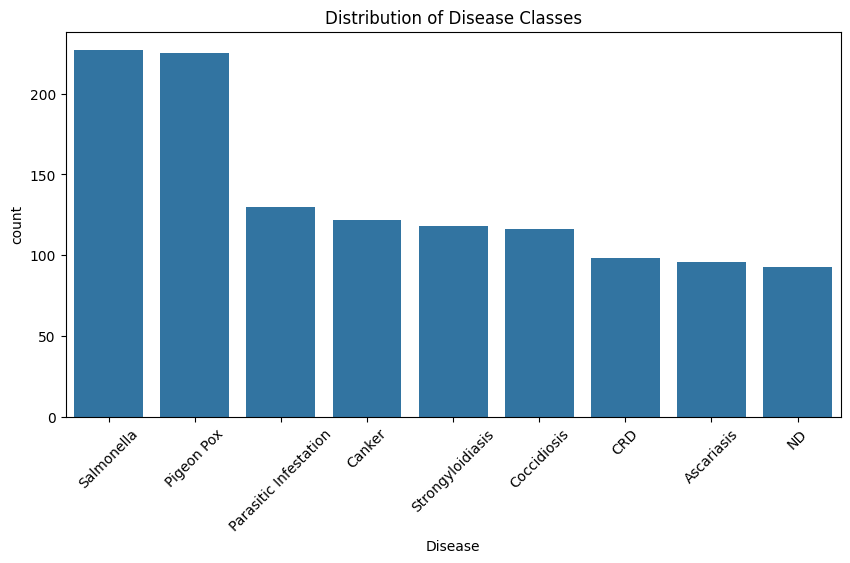

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Disease', order=df['Disease'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Disease Classes')
plt.show()


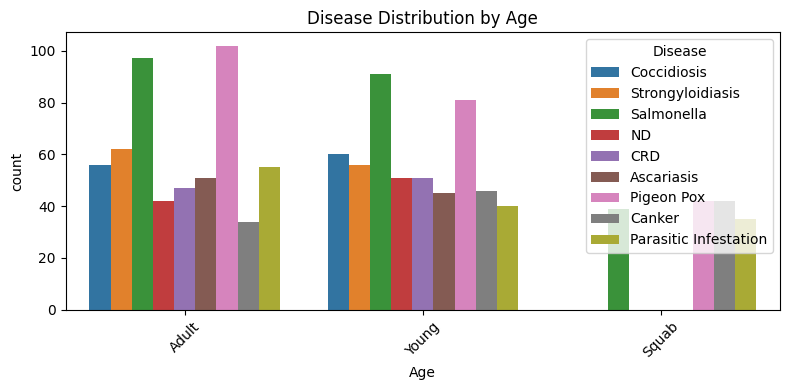

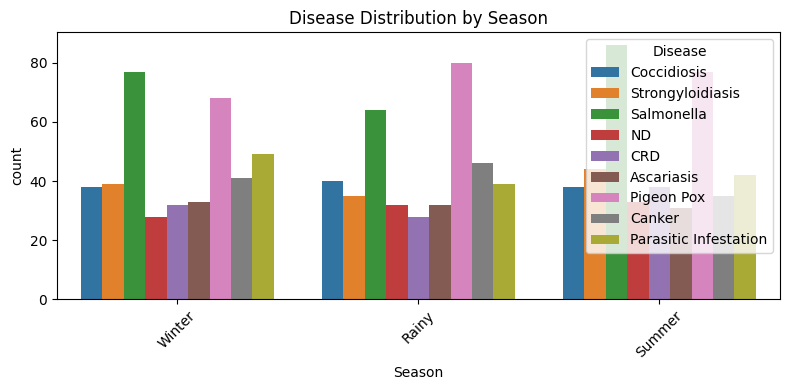

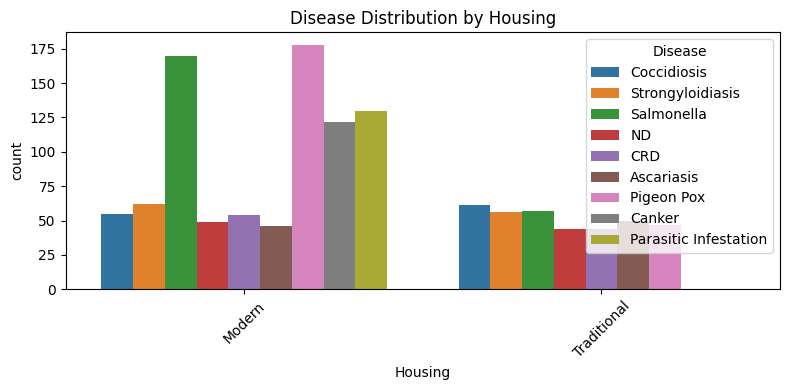

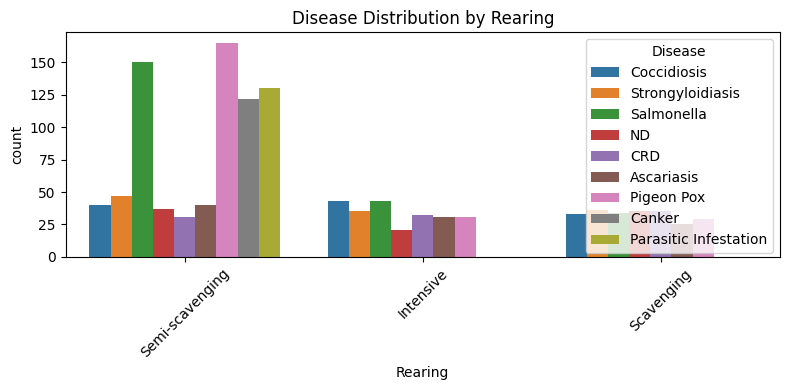

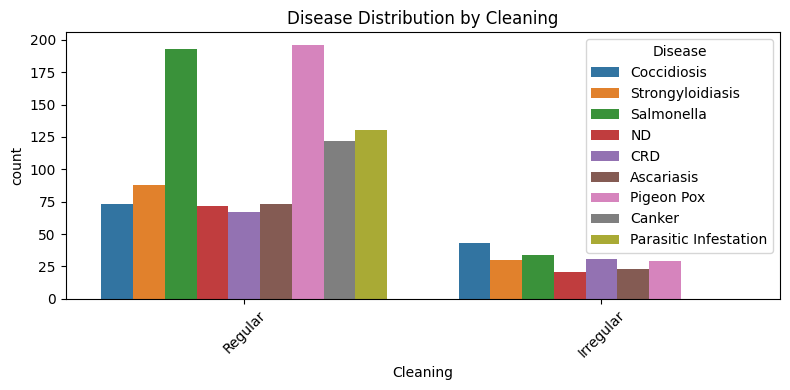

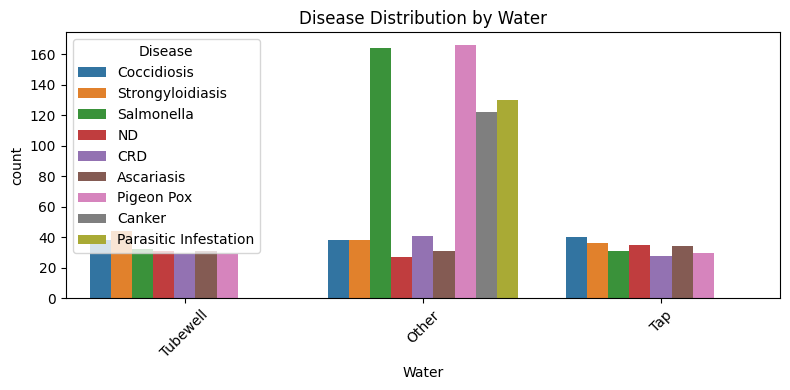

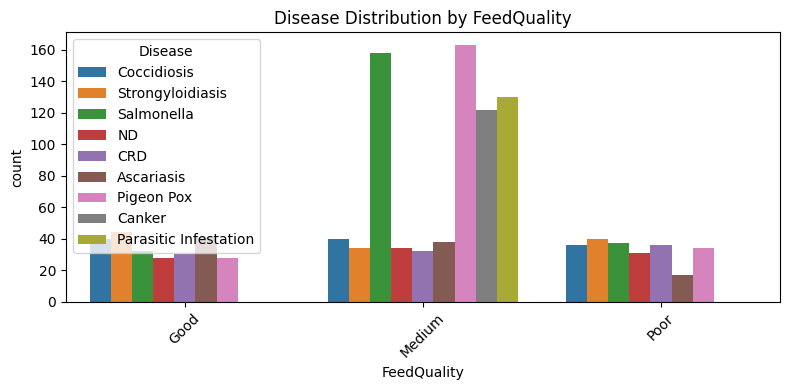

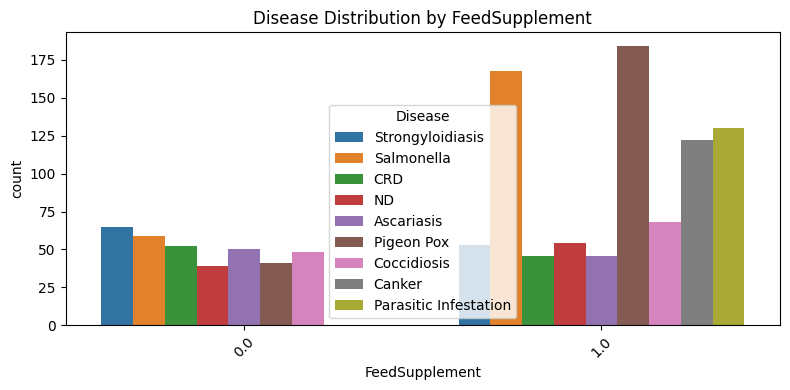

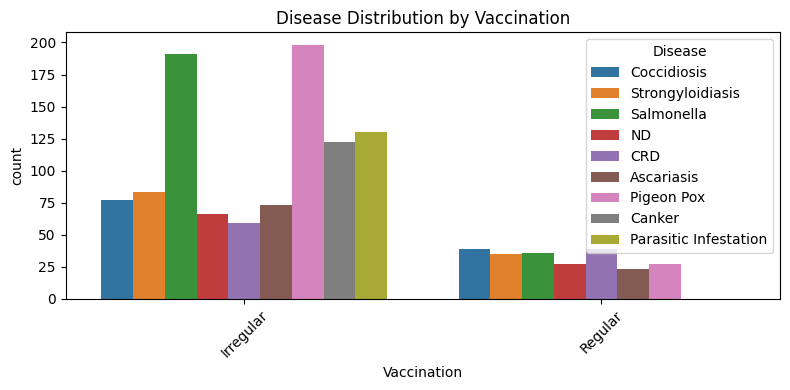

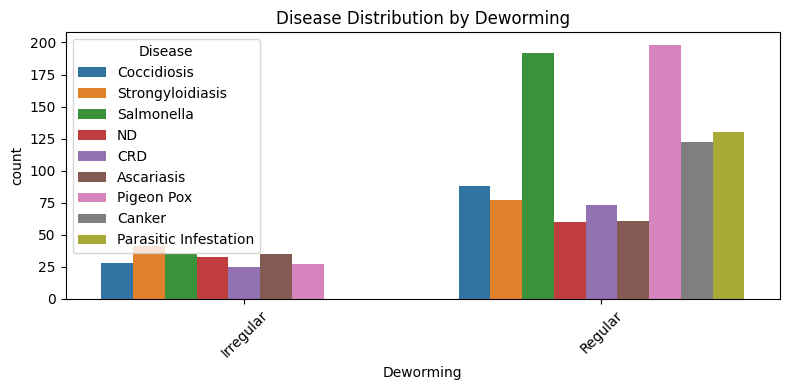

In [17]:
categorical_cols = ['Age', 'Season', 'Housing', 'Rearing', 'Cleaning',
                    'Water', 'FeedQuality', 'FeedSupplement', 'Vaccination', 'Deworming']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='Disease')
    plt.title(f'Disease Distribution by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### See duplicates and number of duplicates in a single column.

In [6]:
print(df.duplicated(subset=['Season'])) #returns as boolian
df['Season'].value_counts()

0       False
1        True
2       False
3       False
4        True
        ...  
1220     True
1221     True
1222     True
1223     True
1224     True
Length: 1225, dtype: bool


,count
Season,
Summer,424
Winter,405
Rainy,396


### Duplicate in all the columns

In [7]:
for col in df.columns:
  duplicate_values = df[col].value_counts()
  duplicate_values = duplicate_values[duplicate_values > 1]

  if not duplicate_values.empty:
    print(f"\nDuplicate values in {col}")
    print(duplicate_values)
  else:
    print(f"\nNo duplicates in {col}")


Duplicate values in Age
Age
Adult    546
Young    521
Squab    158
Name: count, dtype: int64

Duplicate values in Season
Season
Summer    424
Winter    405
Rainy     396
Name: count, dtype: int64

Duplicate values in Housing
Housing
Modern         364
Traditional    359
Name: count, dtype: int64

Duplicate values in Rearing
Rearing
Semi-scavenging    260
Intensive          236
Scavenging         227
Name: count, dtype: int64

Duplicate values in Cleaning
Cleaning
Regular      247
Irregular    211
Name: count, dtype: int64

Duplicate values in Water
Water
Other       255
Tubewell    234
Tap         234
Name: count, dtype: int64

Duplicate values in FeedQuality
FeedQuality
Medium    249
Good      243
Poor      231
Name: count, dtype: int64

Duplicate values in FeedSupplement
FeedSupplement
1.0    369
0.0    354
Name: count, dtype: int64

Duplicate values in Vaccination
Vaccination
Irregular    252
Regular      226
Name: count, dtype: int64

Duplicate values in Deworming
Deworming
Regula

### See for missing values

In [8]:
print(df.isnull().sum()) #here number of missing values per column

Age                 0
Season              0
Housing           502
Rearing           502
Cleaning          767
Water             502
FeedQuality       502
FeedSupplement    502
Vaccination       747
Deworming         747
Treatment         719
Disease             0
dtype: int64


### Fill missing values with Mode

In [9]:
for col in df.columns:
  if df[col].isnull().sum() > 0:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

/tmp/ipython-input-4269006608.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode, inplace=True)


In [10]:
print('\nMissing values after filling:')
print(df.isnull().sum())


Missing values after filling:
Age               0
Season            0
Housing           0
Rearing           0
Cleaning          0
Water             0
FeedQuality       0
FeedSupplement    0
Vaccination       0
Deworming         0
Treatment         0
Disease           0
dtype: int64


### Dropping two colums(Disease, Treatment) and Separating the Target column

*get_dummues()* -> Applies one-hot encoding to all categorical columns. Converts into binary *columns*

*Used drop_first=True* to avoid multicollinearity

In [12]:
df_encoded = pd.get_dummies(df.drop(['Treatment', 'Disease'], axis=1), drop_first=True)
df_target = df['Disease'] #target

In [13]:
print(df_encoded.columns)

Index(['FeedSupplement', 'Age_Squab', 'Age_Young', 'Season_Summer',
       'Season_Winter', 'Housing_Traditional', 'Rearing_Scavenging',
       'Rearing_Semi-scavenging', 'Cleaning_Regular', 'Water_Tap',
       'Water_Tubewell', 'FeedQuality_Medium', 'FeedQuality_Poor',
       'Vaccination_Regular', 'Deworming_Regular'],
      dtype='object')


### Understanding Co relation using heatmap

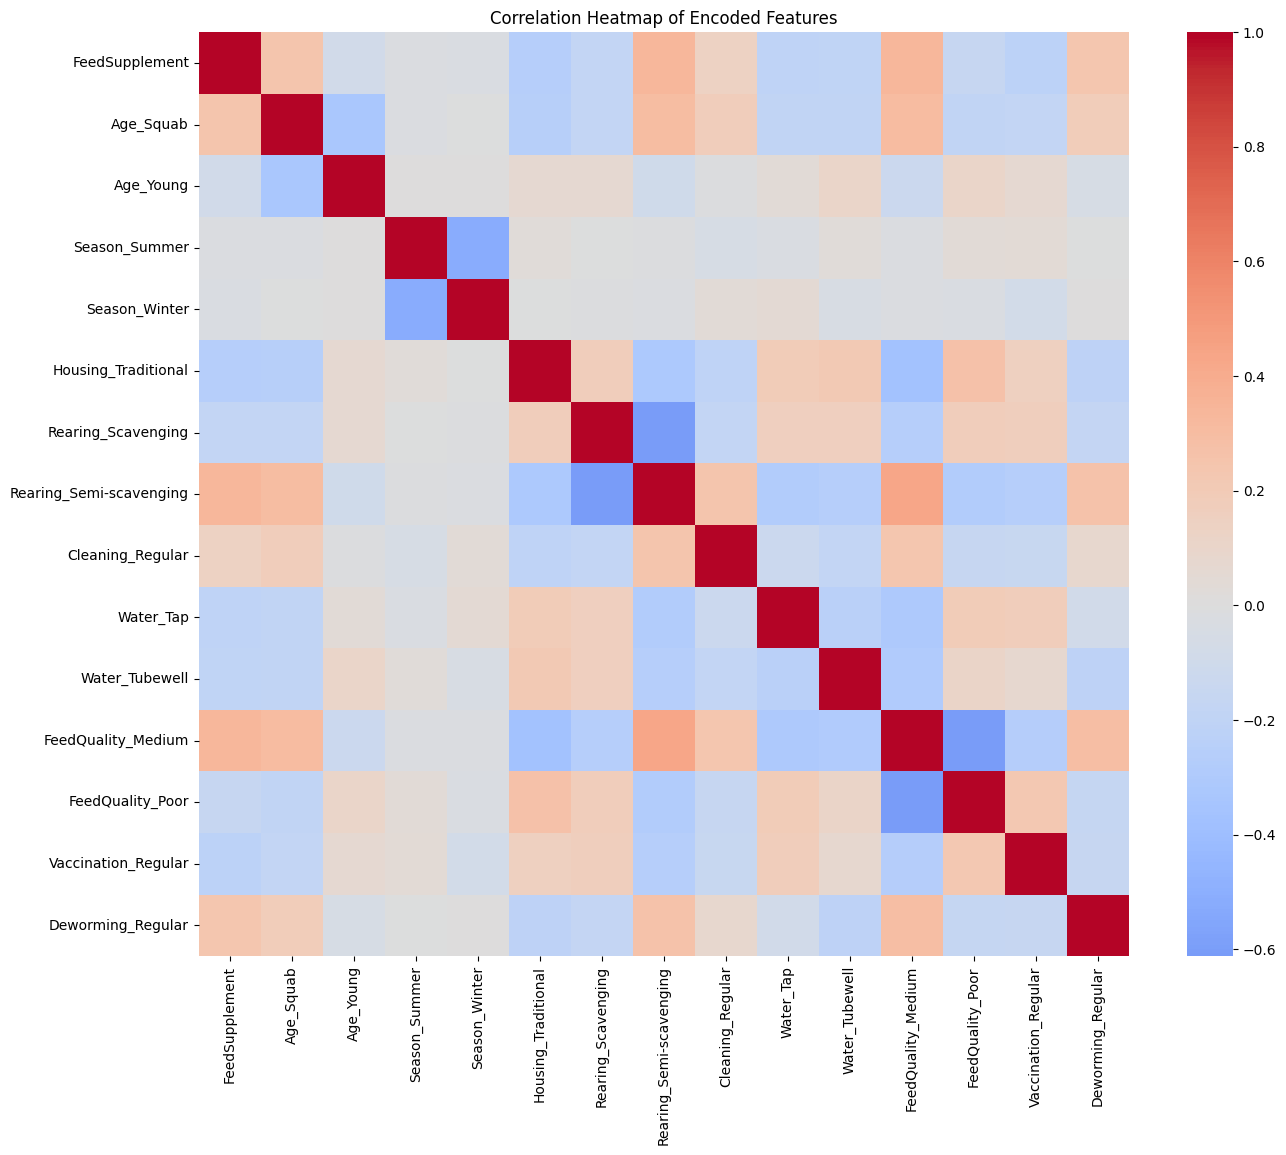

In [16]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

How to Read This Heatmap
1️⃣ Diagonal Line = Self-correlation (Always 1.0)

These are always dark red because a feature is perfectly correlated with itself.

You can ignore this diagonal.

2️⃣ Highly Correlated Features (Off-Diagonal Dark Red or Dark Blue)

Look for features with correlation values close to +1 or -1:

🔴 Positive Correlation

Example: Age_Adult and Age_Young might show negative correlation (dark blue), because they are mutually exclusive.

Similarly, Cleaning_Regular and Cleaning_Irregular — only one can be true at a time due to one-hot encoding.

This is expected in one-hot encoded data from categorical variables.